In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### resize
* 크기 줄일때 : INTER_AREA
* 크기 늘릴때 : INTER_CUBIC, INTER_LINEAR

In [2]:
image = cv2.imread('../Python + OpenCV/picture/moon.jpg')
print(image.shape)

(495, 743, 3)


In [4]:
cv2.imshow('title', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
height, width = image.shape[:2]

In [7]:
shrink = cv2.resize(image, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA)

expand1 = cv2.resize(image, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

expand2 = cv2.resize(image, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)

In [9]:
cv2.imshow('shink', shrink)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(shrink.shape)

(248, 372, 3)


In [10]:
cv2.imshow('expand1', expand1)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(expand1.shape)

(990, 1486, 3)


In [12]:
cv2.imshow('expand2', expand2)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(expand2.shape)

(990, 1486, 3)


### Translation
* warpAffine() : 이미지의 위치를 변경

In [16]:
rows, cols = image.shape[:2]

M = np.float32([[1, 0, 10], [0, 1, 20]]) # x축으로는 10, y축으로는 20 이동

dst = cv2.warpAffine(image, M, (cols, rows))

cv2.imshow('title', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotate
* getRotationMatrix2D(): 사진을 시계 반대방향으로 회전

In [18]:
print(image.shape)

(495, 743, 3)


In [21]:
rows, cols = image.shape[:2]

M = cv2.getRotationMatrix2D((cols/2, rows/2), 60, 0.5) # 중심좌표 = 가로/2, 세로/2

dst = cv2.warpAffine(image, M, (cols, rows))

cv2.imshow('title', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Flip
대칭 변환

flipCode
* 양수 : 좌우대칭
* 0 : 상하대칭
* 음수 : 상하, 좌우 대칭

In [29]:
img = cv2.imread('../Python + OpenCV/picture/moon.jpg')
print(img.shape)

(495, 743, 3)


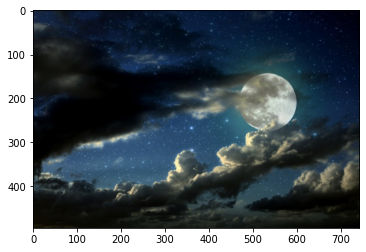

In [31]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

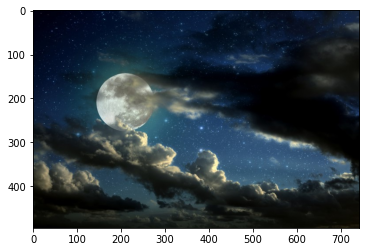

In [32]:
result1 = cv2.flip(img, 1) # 좌우대칭

plt.imshow(result1)
plt.show()

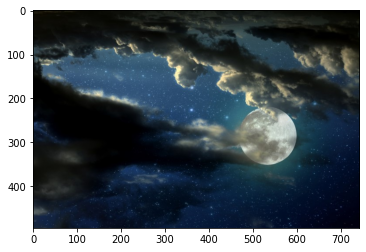

In [34]:
result2 = cv2.flip(img, 0) # 상하대칭

plt.imshow(result2)
plt.show()

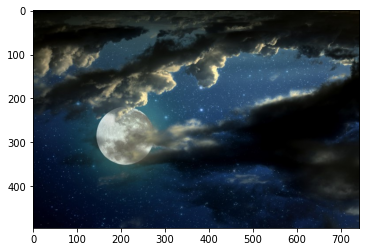

In [35]:
result3 = cv2.flip(img, -1) #상하좌우

plt.imshow(result3)
plt.show()

### Affine Transformation
선의 평행선을 유지하면서 이미지를 변환
* 기준점 3개 → 이동 + 확대 + scale + 반전

In [41]:
rows, cols, ch = image.shape

pts1 = np.float32([[200, 100], [400, 100], [200, 400]])
pts2 = np.float32([[200, 300], [400, 200], [200, 400]])

cv2.circle(image, (200, 100), 10, (255 , 0, 0), -1)
cv2.circle(image, (400, 100), 10, (0, 255, 0), -1)
cv2.circle(image, (200, 200), 10, (0, 0, 255), -1)

M = cv2.getAffineTransform(pts1, pts2) #pst1 이 pst2 로 이동

dst = cv2.warpAffine(image, M, (cols, rows))

cv2.imshow('title', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

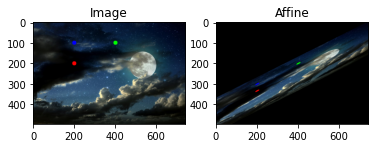

In [42]:
plt.subplot(121), plt.imshow(image[:, :, ::-1]), plt.title('Image')
plt.subplot(122), plt.imshow(dst[:, :, ::-1]), plt.title('Affine')
plt.show()

### Perspective Transformation
* 원근법을 유지하면서 변환 = 직선의 성질 유지, 평행성은 유지 X

In [85]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://cdn.pixabay.com/photo/2015/04/04/06/54/train-706219_960_720.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content))

In [86]:
image = np.asarray(image)
print(image.shape)

(720, 481, 3)


In [87]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

cv2.imshow('title', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [88]:
### 시계방향으로 좌표 지정해주자
top_left = (180, 300)
top_right = (270, 300)
bottom_right = (400, 550)
bottom_left = (80, 550)

# 원래 좌표 정보
pts1 = np.float32([top_left, top_right, bottom_right, bottom_left])

w1 = abs(bottom_right[0] - bottom_left[0]) # 하단부 가로
w2 = abs(top_right[0] - top_left[0]) # 상단부 가로
h1 = abs(top_right[1] - bottom_right[1]) # 오른쪽 세로
h2 = abs(top_left[1] - bottom_left[1]) # 왼쪽 세로

max_width = max([w1, w2])
max_height = max([h1, h2])

# 새 좌표 정보 → 정
pts2 = np.float32([[0, 0],
                  [max_width -1, 0], # 가로 -1, 0
                  [max_width -1, max_height-1], # 가로 -1, 세로 -1
                  [0, max_height-1]]) # 0, 세로 -1

In [89]:
cv2.circle(image, top_left, 10, (255, 0, 0), -1)
cv2.circle(image, top_right, 10, (0, 255, 0), -1)
cv2.circle(image, bottom_right, 10, (0, 0, 255), -1)
cv2.circle(image, bottom_left, 10, (0, 0, 0), -1)

array([[[244, 233, 225],
        [244, 233, 225],
        [244, 233, 225],
        ...,
        [228, 210, 199],
        [228, 210, 199],
        [228, 210, 199]],

       [[244, 233, 225],
        [244, 233, 225],
        [244, 233, 225],
        ...,
        [228, 210, 199],
        [228, 210, 199],
        [228, 210, 199]],

       [[244, 233, 225],
        [244, 233, 225],
        [244, 233, 225],
        ...,
        [228, 210, 199],
        [228, 210, 199],
        [228, 210, 199]],

       ...,

       [[ 45,  69,  91],
        [ 41,  65,  87],
        [ 42,  66,  86],
        ...,
        [ 65,  91, 115],
        [ 67,  91, 115],
        [ 62,  82, 107]],

       [[ 43,  67,  89],
        [ 39,  63,  85],
        [ 41,  65,  85],
        ...,
        [ 68,  95, 121],
        [ 72,  97, 123],
        [ 62,  83, 110]],

       [[ 42,  66,  88],
        [ 39,  64,  84],
        [ 43,  64,  85],
        ...,
        [ 64,  91, 117],
        [ 64,  89, 115],
        [ 66,  87, 114]]

In [91]:
cv2.imshow('title', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [92]:
M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(image, M, (max_width, max_height))

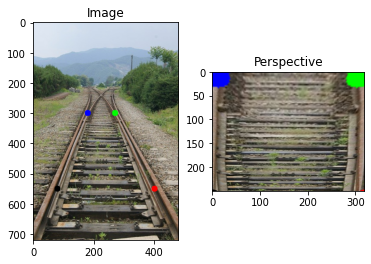

In [93]:
plt.subplot(121), plt.imshow(image[:, :, ::-1]), plt.title('Image')
plt.subplot(122), plt.imshow(dst[:, :, ::-1]), plt.title('Perspective')
plt.show()